In [4]:
#import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
with open('C://Data//hislight_pickles//adlib_light.pickle', 'rb') as handle:
    adlib_light = pickle.load(handle)
    
with open('C://Data//hislight_pickles//restricted_dark.pickle', 'rb') as handle:
    restricted_dark = pickle.load(handle)
    
with open('C://Data//hislight_pickles//adlib_dark.pickle', 'rb') as handle:
    adlib_dark = pickle.load(handle)

with open('C://Data//hislight_pickles//adlib_sucralose.pickle', 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [6]:
list_of_mice = []

for key, val in restricted_dark.items():
    if val["mouse_ID"] not in list_of_mice:
        list_of_mice.append(val["mouse_ID"])

In [15]:
def get_mean_snips(data):

    snips_mean_start= []
    snips_mean_end = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}    

    for mouse in list_of_mice:
        snips_start= []
        snips_end= []

        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                if val["total_licks"] < 3:
                    continue
                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        

       
        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        print(mouse)
        #print(np.max(np.sum(np.abs(snips_end),axis=1)))
        
        not_artifacts= np.sum(np.abs(snips_end),axis=1)<1000
        print(snips_end.shape)
        print(len(not_artifacts))
        snips_end=snips_end[not_artifacts,:]
        print(snips_end.shape)
        
        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
        
    return snips_mean_start, snips_mean_end

In [14]:
adlib_dark_start, adlib_dark_end= get_mean_snips(adlib_dark)

HL202
1568.1988265252292
(10, 150)
10
(9, 150)
HL203
64.06628929002397
(10, 150)
10
(10, 150)
HL204
54.042201723902885
(39, 150)
39
(39, 150)
HL205
56.04158078787867
(15, 150)
15
(15, 150)
HL206
135.20351007234137
(16, 150)
16
(16, 150)
HL207
35.84468513456374
(19, 150)
19
(19, 150)
HL208
72.23578854045606
(23, 150)
23
(23, 150)
HL209
130.22912107171354
(22, 150)
22
(22, 150)
HL210
143.71979796469031
(14, 150)
14
(14, 150)
HL211
66.14966109289142
(13, 150)
13
(13, 150)
HL212
59.621169622791925
(7, 150)
7
(7, 150)


In [2]:
adlib_light_start, adlib_light_end= get_mean_snips(adlib_light)
restricted_dark_start, restricted_dark_end= get_mean_snips(restricted_dark)
adlib_dark_start, adlib_dark_end= get_mean_snips(adlib_dark)
adlib_sucralose_start, adlib_sucralose_end= get_mean_snips(adlib_sucralose)

NameError: name 'adlib_light' is not defined

In [70]:
colors_adlib_light = "#D83F31"
colors_adlib_dark = "#EE9322"
colors_restricted = "#219C90"
colors_sucrose = "#E9B824"

colors_adlib_light_2 = "#f7d8d5"
colors_adlib_dark_2 = "#fbe9d2"
colors_restricted_2 = "#d2ebe8"
colors_sucrose_2 = "#faf0d3"

colors = ["#D83F31", "#EE9322", "#219C90","#E9B824"]

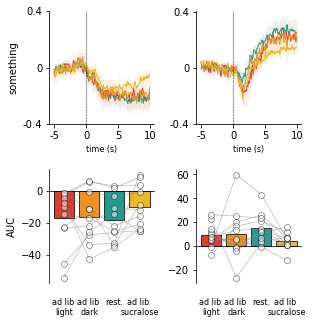

In [95]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2, 
                                        figsize=[5,5],
                                        gridspec_kw={"width_ratios":[1,1], "left":0.2, "hspace":0.4, "wspace":0.4})


tp.shadedError(ax1, adlib_light_start, linecolor=colors_adlib_light, errorcolor=colors_adlib_light_2)
tp.shadedError(ax1, restricted_dark_start, linecolor=colors_restricted, errorcolor=colors_restricted_2)
tp.shadedError(ax1, adlib_dark_start, linecolor=colors_adlib_dark, errorcolor= colors_adlib_dark_2)
tp.shadedError(ax1, adlib_sucralose_start, linecolor=colors_sucrose, errorcolor=colors_sucrose_2)

tp.shadedError(ax2, adlib_light_end, linecolor=colors_adlib_light, errorcolor=colors_adlib_light_2)
tp.shadedError(ax2, restricted_dark_end, linecolor=colors_restricted, errorcolor=colors_restricted_2)
tp.shadedError(ax2, adlib_dark_end, linecolor=colors_adlib_dark, errorcolor= colors_adlib_dark_2)
tp.shadedError(ax2, adlib_sucralose_end, linecolor=colors_sucrose, errorcolor=colors_sucrose_2)

tp.barscatter([np.trapz(np.array(adlib_light_start)[:,50:]),
               np.trapz(np.array(adlib_dark_start)[:,50:]),
               np.trapz(np.array(restricted_dark_start)[:,50:]),
               np.trapz(np.array(adlib_sucralose_start)[:,50:])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax3)

tp.barscatter([np.trapz(np.array(adlib_light_end)[:,50:]),
               np.trapz(np.array(adlib_dark_end)[:,50:]),
               np.trapz(np.array(restricted_dark_end)[:,50:]),
               np.trapz(np.array(adlib_sucralose_end)[:,50:])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax4)

ax1.set_ylabel("something")
ax3.set_ylabel("AUC")

ax1.set_xlabel("time (s)", fontsize=8)
ax2.set_xlabel("time (s)", fontsize=8)

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in [ax1, ax2]:
    ax.set_xticks([0, 50, 100, 150])
    ax.set_xticklabels(["-5", "0", "5", "10"])
    ax.set_yticks([-0.4, 0, 0.4])
    ax.set_yticklabels(["-0.4", "0", "0.4"])
    ax.axvline(50, color="black", linewidth=0.5, linestyle="--")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\diff_conditions.pdf")

In [75]:
tp.barscatter?